In [1]:
import pandas as pa 
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

C:\Users\CYTech Student\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:

tickers = ['NVDA' , 'META', 'TSLA', 'AMZN','GOOG', 'AAPL' , 'MSFT','NFLX']
stock_df = yf.download(tickers , start = "2019-01-12" , end = "2024-01-12" )['Adj Close']
stock_df.head()

[*********************100%%**********************]  8 of 8 completed


,AAPL,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,
2019-01-14,35.992905,80.860497,52.234501,145.389999,96.906387,332.940002,37.317860,22.293333
2019-01-15,36.729565,83.727997,53.857498,148.949997,99.717194,354.640015,37.176472,22.962000
2019-01-16,37.178268,84.189003,54.048500,147.539993,100.068550,351.390015,36.920971,23.070000
2019-01-17,37.399040,84.661003,54.494999,148.300003,100.771255,353.190002,37.635380,23.153999
2019-01-18,37.629391,84.809998,54.912998,150.039993,102.281105,339.100006,38.927765,20.150667


In [4]:
daily_returns = stock_df.pct_change().dropna()
daily_returns.head()

,AAPL,AMZN,GOOG,META,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,
2019-01-15,0.020467,0.035462,0.031071,0.024486,0.029005,0.065177,-0.003789,0.029994
2019-01-16,0.012216,0.005506,0.003546,-0.009466,0.003524,-0.009164,-0.006873,0.004703
2019-01-17,0.005938,0.005606,0.008261,0.005151,0.007022,0.005122,0.019350,0.003641
2019-01-18,0.006159,0.001760,0.007670,0.011733,0.014983,-0.039894,0.034340,-0.129711
2019-01-22,-0.022446,-0.037749,-0.025258,-0.016462,-0.018847,-0.041109,-0.051998,-0.011050


In [9]:
def cvar( returns , alpha = 0.05):
    var = norm.ppf(alpha)*returns.std() #calcul de la valeur methode parametrique 
    returns_less_than_var = returns[returns < -var]
    return -returns_less_than_var.mean()

In [24]:
cvar_dict = {}
for tick in tickers:
    cvar_dict[tick]= cvar(daily_returns[tick])
cvar_df =pa.DataFrame.from_dict(cvar_dict , orient = 'index'  , columns = ['CVAR'])

cvar_df= cvar_df.sort_values(by = 'CVAR', ascending = False )

In [25]:
cvar_df

,CVAR
TSLA,0.002746
NFLX,0.002543
AMZN,0.001869
NVDA,0.001513
META,0.001500
GOOG,0.001251
MSFT,0.000613
AAPL,0.000607


array([[<AxesSubplot:title={'center':'CVAR'}>]], dtype=object)

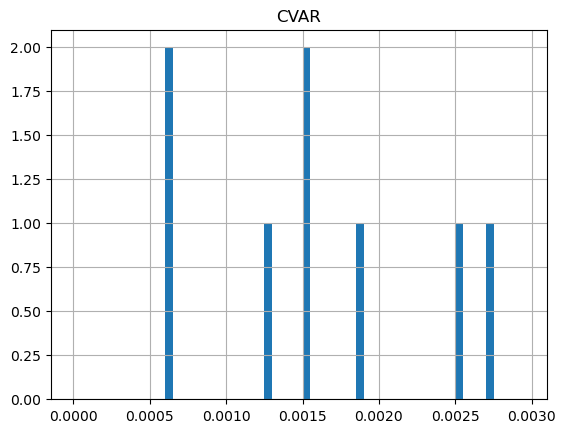

In [28]:
cvar_df.hist( bins = [0.00005 * k for k in range(60)])

In [34]:
#portofolio parameters 

loookback_days = 500
wealth = 10000
weights = pa.Series(1.0/len(tickers) , index = tickers) # allocation des poids egaux

protfolio_returns = daily_returns.fillna(0.0).iloc[-loookback_days:].dot(weights)

#var and cvar
VAR = value_at_risk(wealth , daily_returns , weights, alpha = 0.05)
VAR_retrun = VAR/wealth

CVAR = cvar(wealth , daily_returns , weights, alpha = 0.05)
CVAR_return = CAVR/wealth

plt.figure(figsize= (12,5) , dpi = 100 )
plt.hist(protfolio_returns[protfolio_returns>VAR_return] , bins = 20 )
plt.hist(protfolio_returns[protfolio_returns<VAR_return] , bins = 10)
plt.axvline(VAR_return , color = 'red', linestyle='solid')
plt.axvline(CVAR_return , color = 'red' ,inestyle= 'dashed')
plt.legend(['VAR','CVAR', 'returns' ,'returns <var'])
plt.title('historical VAr and Cvar')
plt.xlabel('eturn')
plt.ylabel('observation frequency')
plt.show()

NameError: name 'value_at_risk' is not defined